In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Image

1500 1500 3


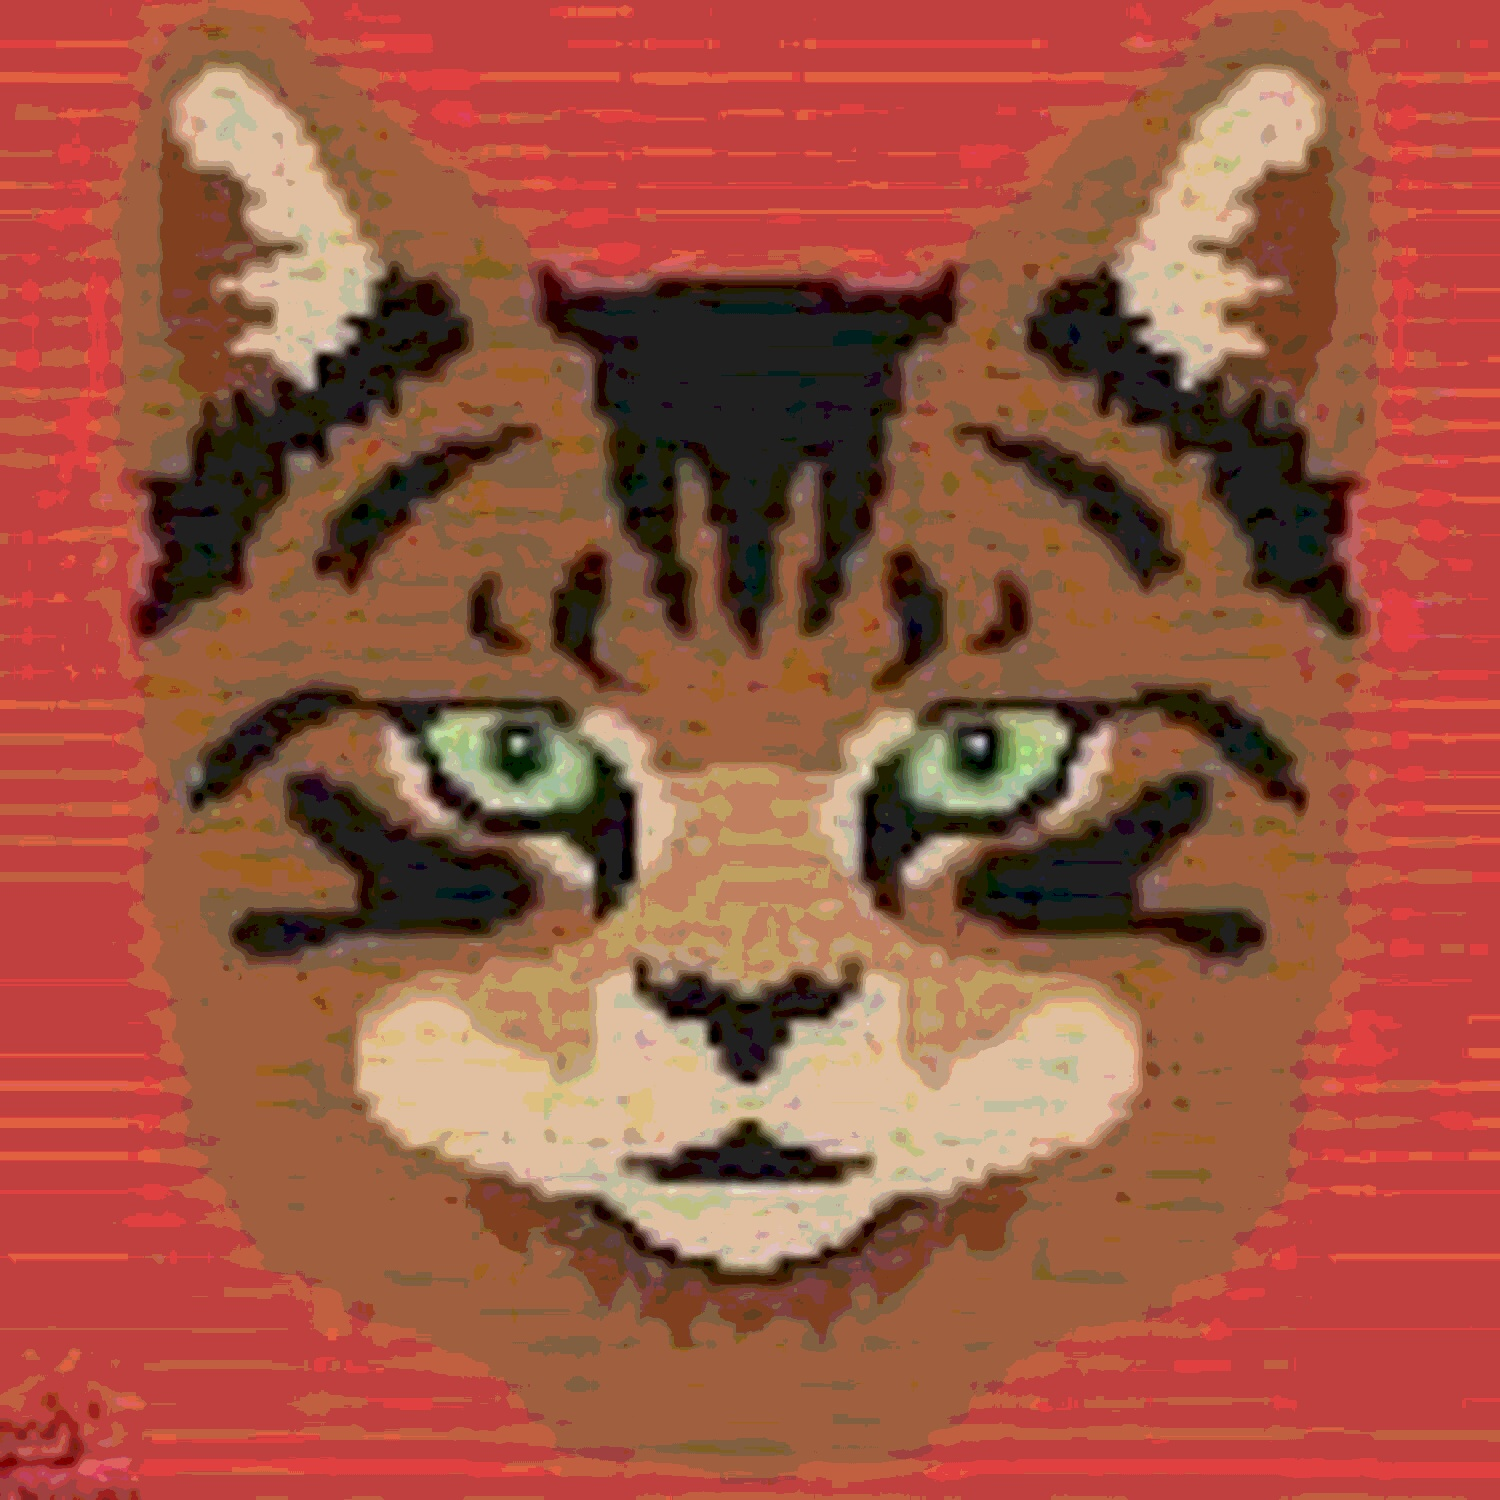

In [ ]:
img = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg')

m, n, c = img.shape
print(m,n,c)

# pre-process the image
P = np.zeros((m, n, c), dtype=np.uint8)
for i in range(m):
    for j in range(n):
        P[i, j, 0] = int(img[i, j, 0] & 0b11100000) # red channel
        P[i, j, 1] = int(img[i, j, 1] & 0b11100000) # green channel
        P[i, j, 2] = int(img[i, j, 2] & 0b11100000) # blue channel

cv2.imwrite('preprocessed_image_rgb.jpg', P)
Image(filename='preprocessed_image_rgb.jpg', width=350, height=350)

#Edge detection-Vgg16

1/1 [==============================] - 28s 28s/step


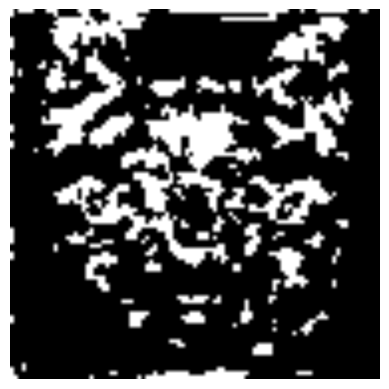

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model

# Define the size of the input image
input_shape = (1500, 1500, 3)

# Load the VGG16 model without the fully connected layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Get the output of the last convolutional layer
output_layer = vgg16.get_layer('block5_conv3').output

# Add new convolutional layers to detect edges
x = Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid')(output_layer)

# Create a new model
model = Model(inputs=vgg16.input, outputs=x)

# Load the input image using OpenCV
image = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg')

# Convert the input image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Canny edge detection algorithm to the input image
# canny_edge_map = cv2.Canny(gray_image, 200, 300)

# Resize the input image to the required size
image = cv2.resize(image, input_shape[:2])

# Preprocess the input image for the VGG16 model
image = tf.keras.applications.vgg16.preprocess_input(image)

# Run the image through the model to get the edge map
edge_map = model.predict(np.array([image]))[0]

# Threshold the edge map to obtain a binary edge map
edge_map = tf.where(edge_map > 0.5, 1.0, 0.0)

# Resize the edge map to the original image size
edge_map = tf.image.resize(edge_map, (gray_image.shape[0], gray_image.shape[1]))


edge_map = tf.image.resize(edge_map, (gray_image.shape[0], gray_image.shape[1])).numpy()
cv2.imwrite('canny_edge.jpg', edge_map)

# Display the input image and the edge maps using Matplotlib
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
# axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# axs[0].set_title('Input Image')
# axs[0].axis('off')
# axs[1].imshow(canny_edge_map, cmap='gray')
# axs[1].set_title('Canny Edge Map')
# axs[1].axis('off')
plt.imshow(edge_map, cmap='gray')
# plt.set_title('VGG16 Edge Map')
plt.axis('off')
plt.show()


#Binarization

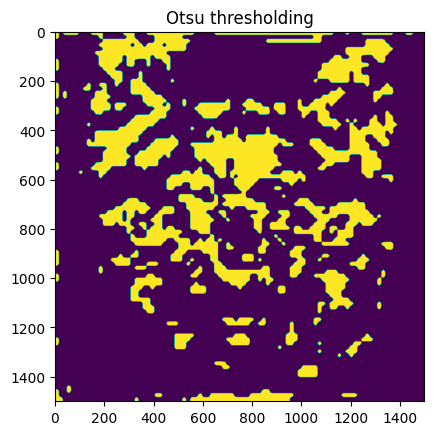

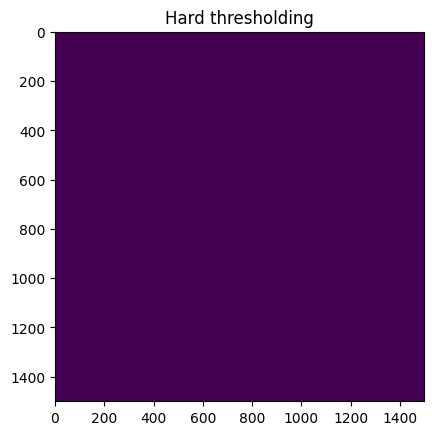

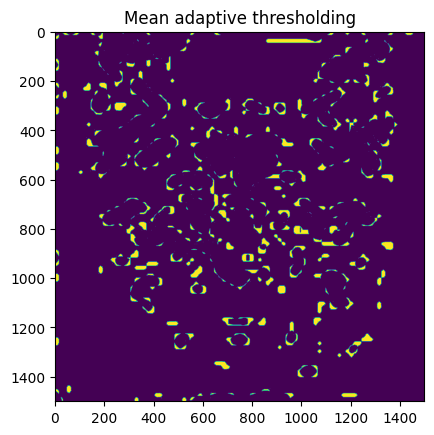

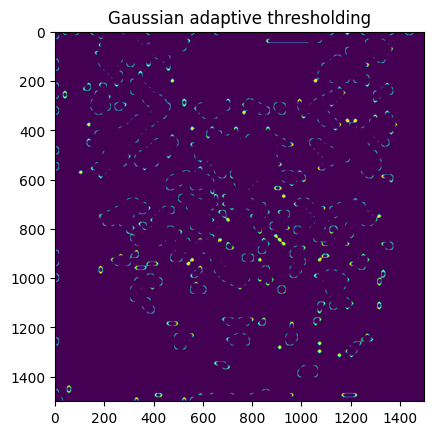

In [ ]:
img = cv2.imread('canny_edge.jpg', 0) 

# Otsu's thresholding
otsu_thresh, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# hard thresholding
hard_thresh = 127
hard = cv2.threshold(img, hard_thresh, 255, cv2.THRESH_BINARY)[1]

# mean adaptive thresholding
mean_block_size = 51
mean_c = 0
mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, mean_block_size, mean_c)

# Gaussian adaptive thresholding
gaussian_block_size = 51
gaussian_c = 0
gaussian = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, gaussian_block_size, gaussian_c)

plt.imshow(otsu)
plt.title('Otsu thresholding')
plt.show()
plt.imshow(hard)
plt.title('Hard thresholding')
plt.show()
plt.imshow(mean)
plt.title('Mean adaptive thresholding')
plt.show()
plt.imshow(gaussian)
plt.title('Gaussian adaptive thresholding')
plt.show()
cv2.imwrite('otsu_thresholded.jpg', otsu)
cv2.imwrite('hard_thresholded.jpg', hard)
cv2.imwrite('mean_thresholded.jpg', mean)
cv2.imwrite('gaussian_thresholded.jpg', gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
RI = cv2.imread('otsu_thresholded.jpg',0)
count=0  
for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
        if (RI[i,j] == 255):
          count+=1
print(count)  

461273


In [ ]:
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
RI = cv2.imread('hard_thresholded.jpg',0)
count=0 
for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
        if (RI[i,j] == 255):
          count+=1
print(count)        

0


In [ ]:
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
RI = cv2.imread('mean_thresholded.jpg',0)
count=0  
for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
        if (RI[i,j] == 255):
          count+=1
print(count)       

79935


In [ ]:
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
RI = cv2.imread('gaussian_thresholded.jpg',0)
count=0  
for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
        if (RI[i,j] == 255):
          count+=1
print(count)  

20506


#RGB

In [ ]:
N = 461273
x = 2
y = 1
R = 1500
C = 1500
b = 8
a = (R*C*y)+N*(x-y)
c = a/b
d = np.sqrt(c)
print("size of the secret image: ",int(d))

size of the secret image:  582


EXTRACTION

In [ ]:
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
SEI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/secret_image.jpg',cv2.IMREAD_COLOR)
RI = cv2.imread('otsu_thresholded.jpg',0)

# Convert secret image into 1D bitstream
s_1 = np.array(SEI.flatten(), np.uint8)
s = np.unpackbits(SEI)

SI_prime = np.zeros_like(CI)
SI_prime[:] = CI

x = 2   # Number of bits to embed in edge pixels
y = 1   # Number of bits to embed in non-edge pixels

for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
         
          index = np.random.randint(0, 4, 1)[0]
          binary_str = format(index, '02b')
          bits = [int(bit) for bit in binary_str]
          for m in range(0,2):
              bit = bits[0]
              SI_prime[i,j,0]&= ~(1 << m)
              SI_prime[i,j,0]|= (bit << m)
              bits = np.delete(bits, 0)

          if (RI[i,j] == 255):     
              for k in range(1,3): 
                      if len(s) == 0:
                          break
                      for l in range(index,x+index):
                          if len(s) == 0:
                            break
                          bit = s[0]
                          SI_prime[i,j,k]&= ~(1 << l)
                          SI_prime[i,j,k]|= (bit << l)
                          s = np.delete(s, 0)
                          if len(s) == 0:
                              break              
          else:
                    for k in range(1,3):
                      if len(s) == 0:
                            break
                      for l in range(index,y+index):
                          if len(s) == 0:
                              break
                          bit = s[0]
                          SI_prime[i,j,k]&= ~(1 << l)  
                          SI_prime[i,j,k]|= (bit << l)
                          s = np.delete(s, 0)
                          if len(s) == 0:
                              break
          if len(s) == 0:
              break
    if len(s) == 0:
          break

# np.save('/content/drive/MyDrive/image/image_rgb_1/my_array.npy', SI_prime)
cv2.imwrite('stego_image_opt.jpg', SI_prime)

True

In [ ]:
import random

def Pixel_Adjustment(pixel):
    return tuple(min(255, max(0, int(c + random.uniform(-10, 10)))) for c in pixel)

secret_image = np.zeros_like(SI_prime)

for i in range(SI_prime.shape[0]):
    for j in range(SI_prime.shape[1]):
        r, g, b = SI_prime[i][j]
        r_new, g_new, b_new = Pixel_Adjustment((r, g, b))
        secret_image[i][j] = (r_new, g_new, b_new)

cv2.imwrite('stego_image_opt_new.jpg', secret_image)        

True

EXTRACTION

In [ ]:
a=6000000
CI = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg', cv2.IMREAD_COLOR)
SI = cv2.imread('stego_image_opt.jpg', cv2.IMREAD_COLOR)
RI = cv2.imread('otsu_thresholded.jpg', 0)

secret=[]
indices=[]
x = 2   # Number of bits to embed in edge pixels
y = 1   # Number of bits to embed in non-edge pixels


for i in range(CI.shape[0]):
    for j in range(CI.shape[1]):
        indices.clear()
        for m in range(0,2):
            bit=(SI_prime[i,j,0] & (1 << m)) >> m
            indices.append(bit)
        my_string = ''.join(map(str, indices))
        decimal_num = int(my_string, 2)
        if (RI[i,j] == 255):
              for k in range(1,3): 
                  for l in range(int(decimal_num),int(x)+int(decimal_num)):
                    s=(SI_prime[i,j,k] & (1 << l)) >> l
                    secret.append(s)
                    if len(secret)==a:
                        break
                  if len(secret)==a:
                        break
            
        else:
          for k in range(1,3):
            for l in range(int(decimal_num),int(y)+int(decimal_num)):
                  s=(SI_prime[i,j,k] & (1 << l)) >> l
                  secret.append(s)
                  if len(secret)==a:
                      break
            if len(secret)==a:
                  break
           
        if len(secret)==a:
            break
    if len(secret)==a:
            break    

packed = []
for i in range(0, len(secret), 8):
    byte = secret[i:i+8]
    packed.append(int(''.join(map(str, byte)), 2))

arr1 = np.array(packed, np.uint8)
arr_2d = arr1.reshape((500, 500, 3))

ValueError: ignored

In [ ]:
from PIL import Image
import numpy as np
import cv2
img1=cv2.cvtColor(arr_2d, cv2.COLOR_BGR2RGB)
img=Image.fromarray(img1)
img.save('secret.jpg')

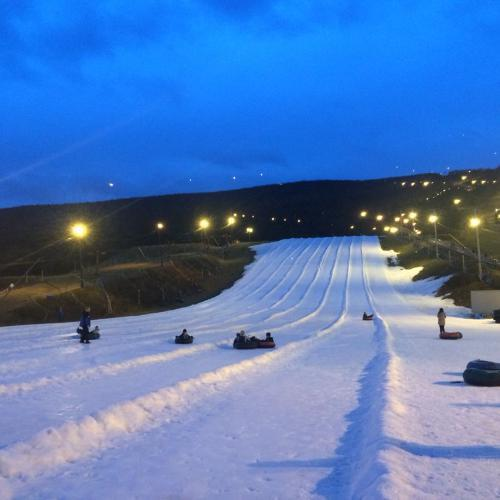

In [ ]:
from IPython.display import Image
Image(filename='secret.jpg', width=300, height=300)

#Performance metrics

### PSNR

In [ ]:
MSE = np.mean((CI - SI_prime)**2)
PSNR = 20 * np.log10(255 / np.sqrt(MSE))
psnr = PSNR.item()
print("PSNR= {:.2f}".format(psnr))

PSNR= 38.04


### SSIM

In [ ]:
import numpy as np
from PIL import Image

# Load the two images
image1 = np.array(Image.open('/content/drive/MyDrive/image/image_rgb_1/cat.jpg'))
image2 = np.array(Image.open('stego_image_opt.jpg'))

# Calculate the mean and standard deviation of each image
mean1 = np.mean(image1)
std1 = np.std(image1)
mean2 = np.mean(image2)
std2 = np.std(image2)

# Print the results
print('Image 1 - Mean: {}, Std: {}'.format(mean1, std1))
print('Image 2 - Mean: {}, Std: {}'.format(mean2, std2))


Image 1 - Mean: 118.8060402962963, Std: 59.298314495470365
Image 2 - Mean: 118.75604888888888, Std: 59.403383084883814


In [ ]:
import numpy as np

# Load two images
I1 = np.array(Image.open('/content/drive/MyDrive/image/image_rgb_1/cat.jpg'))
I2 = np.array(Image.open('stego_image_opt.jpg'))

mean_I1 = np.mean(I1)
mean_I2 = np.mean(I2)

I1_d = I1 - mean_I1
I2_d = I2 - mean_I2

# Calculate the covariance
covariance = np.mean(I1_d * I2_d)

print('Covariance between the two images:', covariance)


Covariance between the two images: 3515.1255804999514


In [ ]:
α = β = γ = 1.0

k1 = 0.01 
k2 = 0.03
L = 255
C1 = (int)(k1 * L)^2
C2 = (int)(k2 * L)^2
C3 = C2 // 2

l = (2 * mean1*mean2 + C1)/(mean1**2 + mean2**2 + C1)
c = (2*std1*std2 + C2)/(std1**2 + std2**2 + C2)
s = (covariance + C3)/(std1*std2 + C3)

SSIM = (l**α) * (c**β) * (s**γ)
print(SSIM)

0.9979002163248241


### Payload

In [ ]:
R=1500 
C=1500 
x=2
y=1
N=461273
a=(1- N/(R*C))*y
b=(N/(R*C)) * x
c=a+b
print("payload= {:.2f}".format(c))

payload= 1.21


In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg')
stego_image = cv2.imread('stego_image_opt.jpg')

# Calculate histograms
original_hist, _ = np.histogram(original_image, bins=256, range=(0, 255))
stego_hist, _ = np.histogram(stego_image, bins=256, range=(0, 255))

# Normalize histograms
original_hist_sum = np.sum(original_hist)
stego_hist_sum = np.sum(stego_hist)

if original_hist_sum == 0:
    original_hist_norm = np.zeros_like(original_hist)
else:
    original_hist_norm = original_hist / original_hist_sum

if stego_hist_sum == 0:
    stego_hist_norm = np.zeros_like(stego_hist)
else:
    stego_hist_norm = stego_hist / stego_hist_sum

# Calculate chi-square distance
chi_square_dist = np.sum(np.divide(np.square(original_hist_norm - stego_hist_norm), original_hist_norm))

print("chi= {:.2f}".format(chi_square_dist))

chi= 0.02


In [ ]:
import cv2

# Load the images
cover_image = cv2.imread('/content/drive/MyDrive/image/image_rgb_1/cat.jpg')
secret_image = cv2.imread('stego_image_opt.jpg')


# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute the histograms for each channel
hist1_r = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist1_g = cv2.calcHist([image1], [1], None, [256], [0, 256])
hist1_b = cv2.calcHist([image1], [2], None, [256], [0, 256])

hist2_r = cv2.calcHist([image2], [0], None, [256], [0, 256])
hist2_g = cv2.calcHist([image2], [1], None, [256], [0, 256])
hist2_b = cv2.calcHist([image2], [2], None, [256], [0, 256])

# Normalize the histograms
cv2.normalize(hist1_r, hist1_r, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist1_g, hist1_g, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist1_b, hist1_b, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cv2.normalize(hist2_r, hist2_r, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_g, hist2_g, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist2_b, hist2_b, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Compute the correlation coefficients
corr_r = cv2.compareHist(hist1_r, hist2_r, cv2.HISTCMP_CORREL)
corr_g = cv2.compareHist(hist1_g, hist2_g, cv2.HISTCMP_CORREL)
corr_b = cv2.compareHist(hist1_b, hist2_b, cv2.HISTCMP_CORREL)

# Compute the average correlation coefficient
score = (corr_r + corr_g + corr_b) / 3

print('Histogram similarity score: {:.2f}'.format(score))


Histogram similarity score: 0.98
